# Lab 3: Morphology

Authors: Edison Jair Bejarano Sepulveda - Roberto Ariosa


## Statement:

1. Consider Treebank corpus.

  - Train HMM, TnT, perceptron and CRF models using the first 500, 1000, 1500, 2000, 2500 and 3000 sentences.

2. Evaluate the resulting 24 models using sentences from 3001.

- Provide a figure with four learning curves, each per model type (X=training set size; Y=accuracy).


Conclusions
Which model would you select? 


# Libraies

In [ ]:
!pip install -q python-crfsuite

In [ ]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import time
nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

# 1. Considering the Treebank corpus (500, 1000, 1500, 2000, 3000)
Training for HMM, TnT, CRF and evaluated model using sentences from 3001

In [ ]:
df = pd.DataFrame(columns=['Train size', 'Model', 'Accuracy', 'Time'])

for n_sentences in [500, 1000, 1500, 2000, 2500, 3000]:
  print('********************************************')
  print(f'      Corpus with a train size of: ',n_sentences)
  print('. . . . . . . . . Starting . . . . . . . . .')
  
  print("")
  train_data = nltk.corpus.treebank.tagged_sents()[:n_sentences]
  test_data = nltk.corpus.treebank.tagged_sents()[3000:]

  ## HMM
  print('-----------Hidden Markov Model--------------')
  tic =time.time()
  HMM = nltk.tag.hmm.HiddenMarkovModelTrainer() \
    .train_supervised(train_data)
  accuracy = round(HMM.accuracy(test_data), 3)
  toc = time.time()
  run_time = toc-tic
  print('Accuracy: ' + str(round(HMM.accuracy(test_data), 3)) +'   Time :' + str(run_time))
  df = df.append({'Train size':n_sentences, 'Model':'HMM','Accuracy':accuracy,'Time':run_time}, ignore_index  = True)

  # TnT
  print('--------------------TnT---------------------')
  tic =time.time()
  TnT = nltk.tag.tnt.TnT()
  TnT.train(train_data)
  accuracy = round(TnT.accuracy(test_data), 3)
  toc = time.time()
  run_time = toc-tic
  print('Accuracy: ' + str(round(TnT.accuracy(test_data), 3))+'   Time :' + str(run_time))
  df = df.append({'Train size':n_sentences, 'Model':'TnT','Accuracy':accuracy,'Time':run_time}, ignore_index  = True)

  
  # Perceptron
  print('-----------------Perceptron-----------------')
  tic =time.time()
  PER = nltk.tag.perceptron.PerceptronTagger(load=False)
  PER.train(train_data)
  print('Accuracy: ' + str(round(PER.accuracy(test_data), 3))+'   Time :' + str(run_time))
  accuracy = round(PER.accuracy(test_data), 3)
  toc = time.time()
  run_time = toc-tic
  df = df.append({'Train size':n_sentences, 'Model':'Perceptron','Accuracy':accuracy,'Time':run_time}, ignore_index  = True)


  # CRF
  print('---------------------CRF--------------------')
  tic =time.time()
  CRF = nltk.tag.CRFTagger()
  CRF.train(train_data,'crf_tagger_model')
  print('Accuracy: ' + str(round(CRF.accuracy(test_data), 3))+'   Time :' + str(run_time))
  accuracy = round(CRF.accuracy(test_data), 3)
  toc = time.time()
  run_time = toc-tic
  df = df.append({'Train size':n_sentences, 'Model':'CRF','Accuracy':accuracy,'Time':run_time}, ignore_index  = True)


  print('Finished . . . . .')
  print('********************************************')
  
  print('')
df.head()


********************************************
      Corpus with a train size of:  500
. . . . . . . . . Starting . . . . . . . . .

-----------Hidden Markov Model--------------
Accuracy: 0.173   Time :7.162702322006226
--------------------TnT---------------------
Accuracy: 0.747   Time :18.754546880722046
-----------------Perceptron-----------------
Accuracy: 0.914   Time :18.754546880722046
---------------------CRF--------------------
Accuracy: 0.91   Time :7.789661884307861
Finished . . . . .
********************************************

********************************************
      Corpus with a train size of:  1000
. . . . . . . . . Starting . . . . . . . . .

-----------Hidden Markov Model--------------
Accuracy: 0.221   Time :7.766669988632202
--------------------TnT---------------------
Accuracy: 0.796   Time :48.149120807647705
-----------------Perceptron-----------------
Accuracy: 0.932   Time :48.149120807647705
---------------------CRF--------------------
Accuracy: 0.925

,Train size,Model,Accuracy,Time
0,500,HMM,0.173,7.162702
1,500,TnT,0.747,18.754547
2,500,Perceptron,0.914,7.789662
3,500,CRF,0.910,5.150566
4,1000,HMM,0.221,7.766670


In [ ]:
# saving the dataframe
df.to_csv('/content/drive/MyDrive/Colab Notebooks/2.IHLT/lab4/results.csv')

# 2. Results (Plots and comparasions) 

In [ ]:
# Load data (Run this line if you don´t train previously your models)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2.IHLT/lab4/results.csv')
df.head(24)

,Unnamed: 0,Train size,Model,Accuracy,Time
0,0,500,HMM,0.173,7.162702
1,1,500,TnT,0.747,18.754547
2,2,500,Perceptron,0.914,7.789662
3,3,500,CRF,0.910,5.150566
4,4,1000,HMM,0.221,7.766670
5,5,1000,TnT,0.796,48.149121
6,6,1000,Perceptron,0.932,11.303213
7,7,1000,CRF,0.925,10.533151
8,8,1500,HMM,0.262,8.417785
9,9,1500,TnT,0.827,80.750498


In [ ]:
df.describe()

,Unnamed: 0,Train size,Accuracy,Time
count,24.000000,24.000000,24.000000,24.000000
mean,11.500000,1750.000000,0.744292,32.616818
std,7.071068,872.278376,0.282485,34.596855
min,0.000000,500.000000,0.173000,5.150566
25%,5.750000,1000.000000,0.652250,9.229120
50%,11.500000,1750.000000,0.893000,18.118323
75%,17.250000,2500.000000,0.939500,39.885335
max,23.000000,3000.000000,0.958000,114.220438


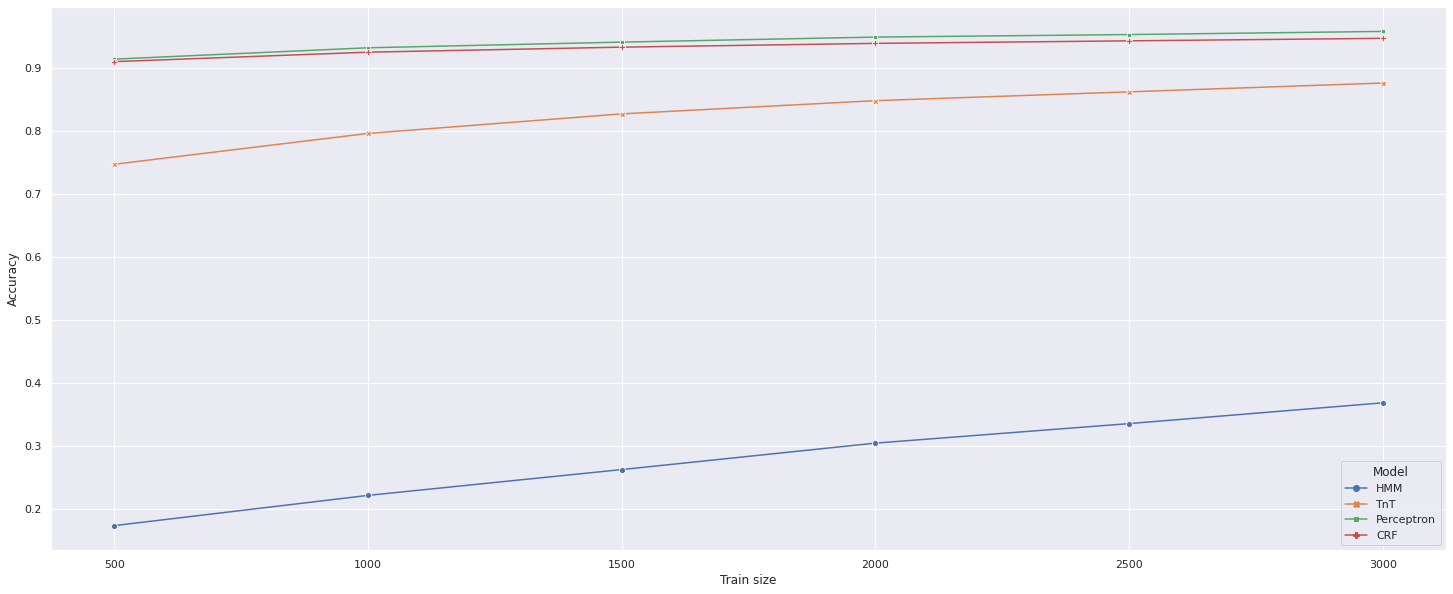

In [ ]:
plt.figure(figsize=(25,10))
sns.set_theme()
sns.lineplot(data=df, x="Train size", y="Accuracy", hue="Model", style="Model", markers=True, dashes=False)

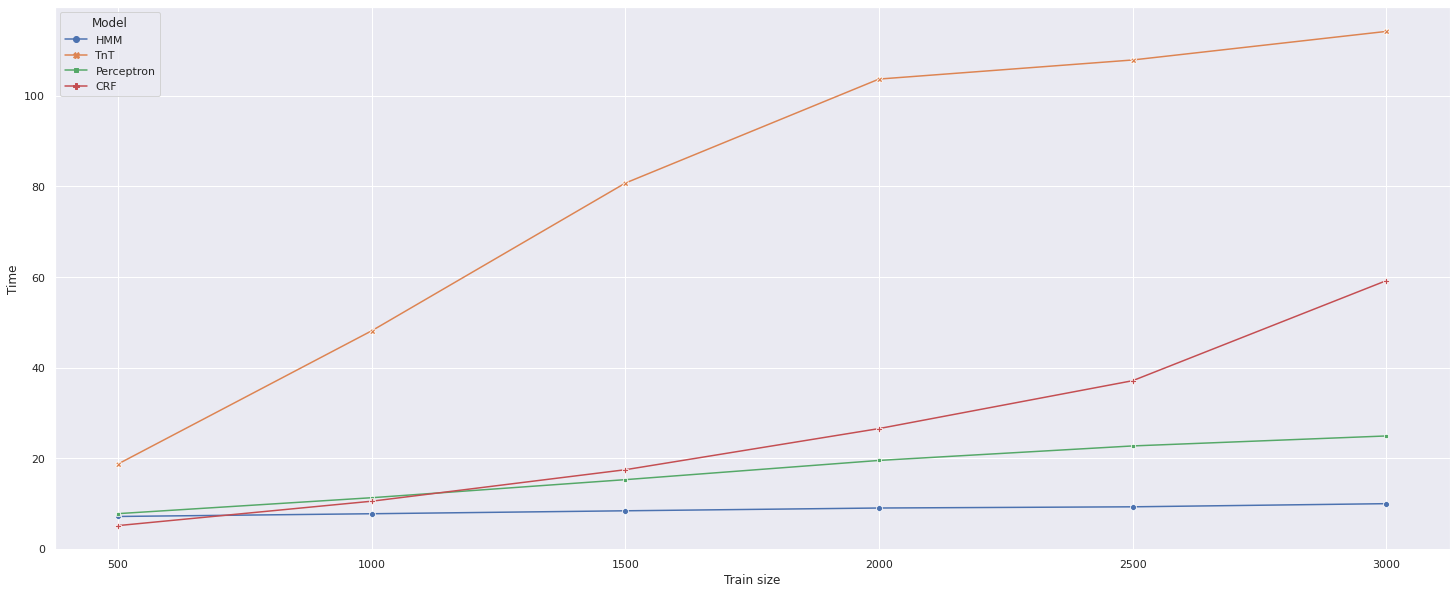

In [ ]:
plt.figure(figsize=(25,10))
sns.set_theme()
sns.lineplot(data=df, x="Train size", y="Time", hue="Model", style="Model", markers=True, dashes=False)

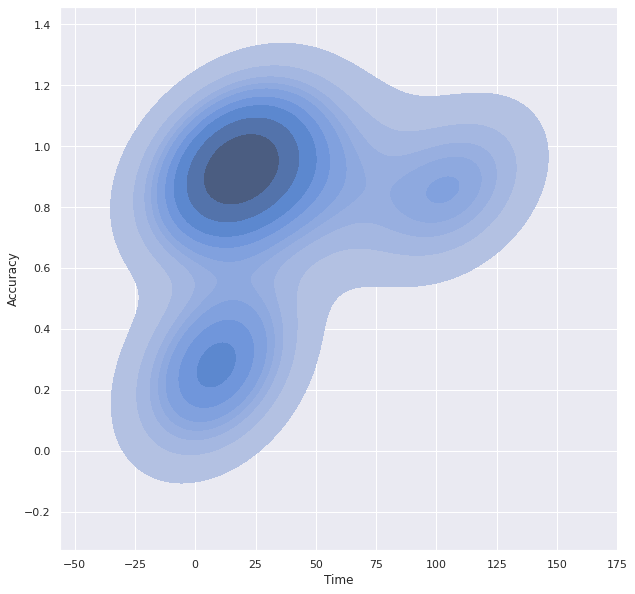

In [ ]:
from matplotlib.ticker import MaxNLocator
plt.figure(figsize=(10, 10))
ax = sns.kdeplot(x='Time', y='Accuracy', data=df, shade=True)
ax.axes.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='Train size', y='Time', z='Accuracy',
                    color='Model', symbol='Model')
fig.show()

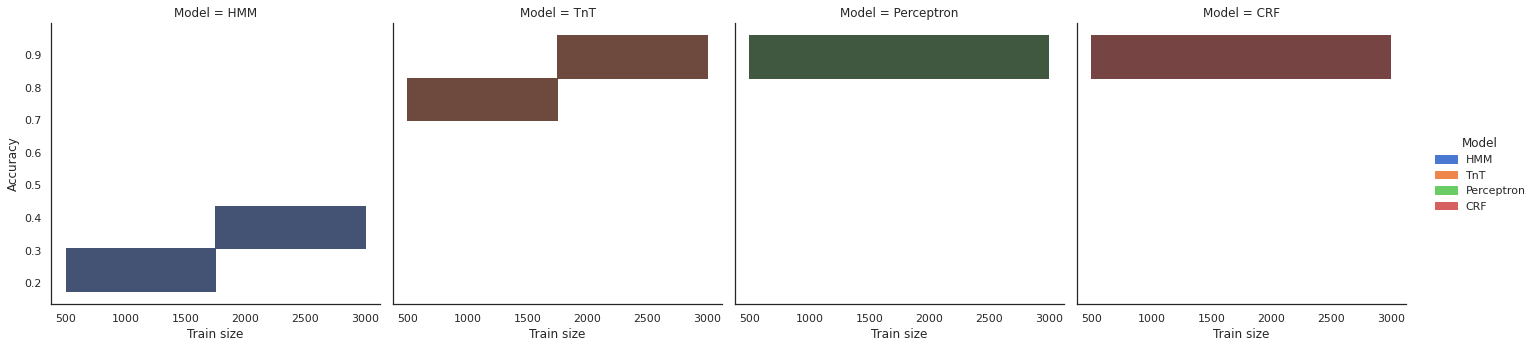

In [ ]:
sns.set(style="white", palette="muted", color_codes=True)
sns.displot(data=df, x="Train size",y="Accuracy", hue="Model", col="Model")
plt.show()

# Conclusions
Which model would you select? 
* Following the results obtained and as is showed in the picture above, the best models are the perceptron and CRF maintaining high accuracy for all the train size in where it was tested. Also, we can observe, that this two models have good performance and similar results. Otherwise, the perceptron model are the winner with 0.960 , compared with 0.947 from CFR, in the train size of 3000 if we take as consideration the accuracy. In other hand, if we take in consideration the <Time>, it was observed that the perceptron take 24,9, meanwhile 59,6 for CRF. In other words, taking into account these two variables, our first conclusion is that Perceptron it is the best option, because have a good accuracy and take less time in its inference.


# Models

## HMM


In [ ]:
trainer = nltk.tag.hmm.HiddenMarkovModelTrainer()
HMM = trainer.train_supervised(train_data)

print('accuracy: ' + str(round(HMM.evaluate(test_data), 3)))
HMM.tag(['the', 'men', 'attended', 'to', 'the', 'meetings'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  after removing the cwd from sys.path.


accuracy: 0.106


[('the', 'DT'),
 ('men', 'NNP'),
 ('attended', 'NNP'),
 ('to', 'NNP'),
 ('the', 'NNP'),
 ('meetings', 'NNP')]

## TnT

In [ ]:
TnT = nltk.tag.tnt.TnT()
TnT.train(train_data)

print('accuracy: ' + str(round(TnT.evaluate(test_data), 3)))
TnT.tag(['the', 'men', 'attended', 'to', 'the', 'meetings'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  after removing the cwd from sys.path.


accuracy: 0.457


[('the', 'DT'),
 ('men', 'NNS'),
 ('attended', 'Unk'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('meetings', 'Unk')]

## Perceptron

In [ ]:
PER = nltk.tag.perceptron.PerceptronTagger(load=False)
PER.train(train_data)

print('accuracy: ' + str(round(PER.evaluate(test_data), 3)))

PER.tag(['the', 'men', 'attended', 'to', 'the', 'meetings'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  after removing the cwd from sys.path.


accuracy: 0.65


[('the', 'DT'),
 ('men', 'NN'),
 ('attended', 'CC'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('meetings', 'NN')]

## CRF

In [ ]:
CRF = nltk.tag.CRFTagger()
CRF.train(train_data,'crf_tagger_model')

print('accuracy: ' + str(round(CRF.evaluate(test_data), 3)))
CRF.tag(['the', 'men', 'attended', 'to', 'the', 'meetings'])

# Training and save:
CRF.train(train_data,"fileName")
# Load
CRF.set_model_file("fileName")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  after removing the cwd from sys.path.


accuracy: 0.685


[('the', 'DT'),
 ('men', 'NN'),
 ('attended', 'VBD'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('meetings', 'NNS')]

Which model would you select? Justify the answer.